## 7.2　Keras のモデルを構築するためのさまざまな方法

In [1]:
import copy
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

#### 7.2.1　Sequential モデル

In [2]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [3]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.02549109, -0.1301166 , -0.12893793,  0.21543062, -0.24872006,
          0.16907021, -0.23072204,  0.128014  ,  0.20075727,  0.00769654,
         -0.25736094, -0.06595992, -0.25242686,  0.08099803,  0.13158536,
          0.22478747,  0.27042854, -0.06921557, -0.24555752, -0.27094102,
          0.12117177,  0.2549526 , -0.17671731,  0.22831655,  0.03138018,
         -0.06449486,  0.01188463, -0.05061822,  0.13455355,  0.00254539,
         -0.19642475, -0.20753092,  0.20329791,  0.14266655, -0.04647508,
          0.01465791, -0.10429524,  0.03573301,  0.11794707,  0.23968071,
          0.15307176,  0.2481234 , -0.21163794, -0.17486   ,  0.0525558 ,
         -0.058024  , -0.01715586,  0.02758664,  0.20867366,  0.28593767,
          0.11411965,  0.14548177,  0.23119378, -0.2398331 , -0.2781765 ,
         -0.20084187,  0.13425061, -0.294999  ,  0.19544172, -0.2331828 ,
          0.11647019,  0.05664307,  0.01711

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = keras.Sequential(name='may_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "may_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu'))

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### 7.2.2　Function API

In [10]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
inputs.shape

TensorShape([None, 3])

In [12]:
inputs.dtype

tf.float32

In [13]:
features.shape

TensorShape([None, 64])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [15]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [16]:
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

In [17]:
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

In [18]:
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

In [19]:
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [20]:
num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop', loss=['mean_squared_error', 'categorical_crossentropy'], metrics=[['mean_absolute_error'], ['accuracy']])
model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1)
model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 9ms/step


In [21]:
model.compile(
    optimizer='rmsprop',
    loss={'priority': 'mean_squared_error', 'department': 'categorical_crossentropy'},
    metrics={'priority': ['mean_absolute_error'], 'department': ['accuracy']}
    )

model.fit({'title': title_data, 'text_body': text_body_data, 'tags': tags_data}, {'priority': priority_data, 'department': department_data}, epochs=1)
model.evaluate({'title': title_data, 'text_body': text_body_data, 'tags': tags_data}, {'priority': priority_data, 'department': department_data})
priority_preds, department_preds = model.predict({'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

40/40 [==============================] - 0s 9ms/step


keras の `batch_size` のデフォルトは `32` である。

In [22]:
1280 / 32

40.0

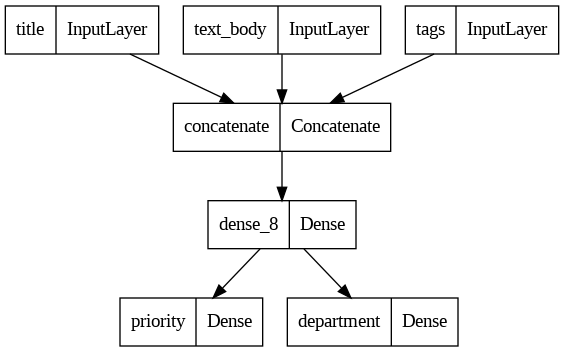

In [23]:
keras.utils.plot_model(model, 'ticket_classifier.png')

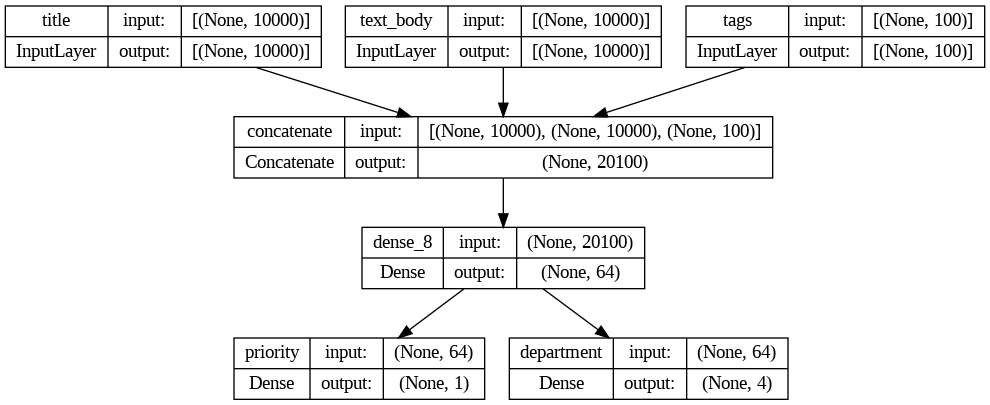

In [24]:
keras.utils.plot_model(model, 'ticket_classifier_with_shape_info.png', show_shapes=True)

In [25]:
model.layers

In [26]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [27]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [28]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs=[title, text_body, tags],
                        outputs=[priority, department, difficulty])

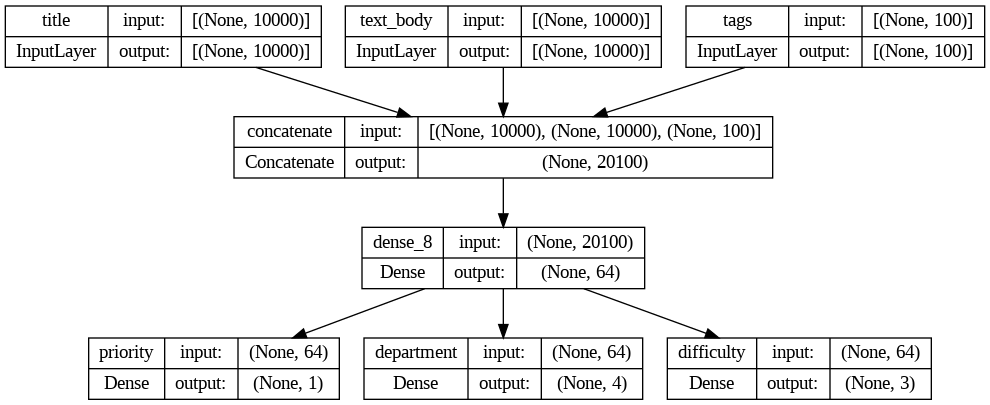

In [29]:
keras.utils.plot_model(new_model, 'updated_ticket_classifier.png', show_shapes=True)

#### 7.2.3　Model クラスのサブクラス化

In [30]:
class CustomerTicketModel(keras.Model):
  def __init__(self, num_departments):
    super().__init__()
    self.concat_layer = layers.Concatenate()
    self.mixing_layer = layers.Dense(64, activation='relu')
    self.priority_scorer = layers.Dense(1, activation='sigmoid')
    self.department_classifier = layers.Dense(num_departments, activation='softmax')

  def call(self, inputs):
    title = inputs['title']
    text_body = inputs['text_body']
    tags = inputs['tags']

    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [31]:
model = CustomerTicketModel(num_departments=4)
priority, department = model({'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

`__call__( )` によって、重みの形状を自動的に推定して作成した後に、`self.call( )` が呼び出されている。

In [32]:
def __call__(self, inputs):
  if not self.built:
    self.build(inputs.shape)
    self.built = True
  return self.call(inputs)

In [33]:
model.compile(optimizer='rmsprop', loss=['mean_squared_error', 'categorical_crossentropy'], metrics=[['mean_absolute_error'], ['accuracy']])
model.fit({'title': title_data, 'text_body': text_body_data, 'tags': tags_data}, [priority_data, department_data])
model.evaluate({'title': title_data, 'text_body': text_body_data, 'tags': tags_data}, [priority_data, department_data])
priority_preds, department_preds = model.predict({'title': title_data, 'text_body': text_body_data, 'tags': tags_data})

40/40 [==============================] - 0s 10ms/step


#### 7.2.4　コンポーネントは組み合わせ自由

In [34]:
class Classifier(keras.Model):
  
  def __init__(self, num_classes=2):
    super().__init__()
    if num_classes == 2:
      num_units = 1
      activation = 'sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units, activation=activation)
    
  def call(self, inputs):
    return self.dense(inputs)
  
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [35]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

  def __init__(self, num_classes=2):
    super().__init__()
    self.dense = layers.Dense(64, activation='relu')
    self.classifier = binary_classifier

  def call(self, inputs):
    features = self.dense(inputs)
    return self.classifier(features)

model = MyModel()